In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the provided Excel files to check the content
file_path_mpdc = '/Users/aof_mac/Desktop/Anomaly detect series/data_update_temp/Merged_Dan_Chang_Data_with_Indices_combine_finish.xlsx'
file_path_isan = '/Users/aof_mac/Desktop/Anomaly detect series/data_update_temp/Merged_ISAN_Data_with_Indices_Merg_finish.xlsx'

# Read the sheets to inspect the data
mpdc_data = pd.read_excel(file_path_mpdc, None)  # Load all sheets
isan_data = pd.read_excel(file_path_isan, None)  # Load all sheets

# Check the available sheet names
mpdc_data.keys(), isan_data.keys()

# Load the data from the first sheet of both files
mpdc_df = mpdc_data['Sheet1']
isan_df = isan_data['Sheet1']

# Display the first few rows to understand the structure
#mpdc_df.head(),
#isan_df.head()


In [ ]:
isan_df['โรงงานต้นสังกัด'].unique()
# MKS MAC

array(['MPV', 'MPL', 'MPK'], dtype=object)

In [ ]:
mpdc_df['โรงงานต้นสังกัด'].unique()

array(['MP'], dtype=object)

In [ ]:
# Convert 'วันที่' column to datetime format for both dataframes
mpdc_df['วันที่'] = pd.to_datetime(mpdc_df['วันที่'], errors='coerce')
isan_df['วันที่'] = pd.to_datetime(isan_df['วันที่'], errors='coerce')

# Filter rows where the month in 'วันที่' is December
mpdc_december_df = mpdc_df[mpdc_df['วันที่'].dt.month == 12]
isan_december_df = isan_df[isan_df['วันที่'].dt.month == 12]

# Display the filtered data for December
mpdc_december_df.head(), isan_december_df.head()


(   โรงงานต้นสังกัด  เลขแปลง     วันที่            ชื่อ  \
 49              MP   900109 2023-12-13  บจ.ไร่ด่านช้าง   
 50              MP   901124 2023-12-13  บจ.ไร่ด่านช้าง   
 51              MP   910103 2023-12-13  บจ.ไร่ด่านช้าง   
 52              MP   907102 2023-12-13  บจ.ไร่ด่านช้าง   
 53              MP   917121 2023-12-13  บจ.ไร่ด่านช้าง   
 
                    ประเภทรถขนส่ง     ทะเบียน  น้ำหนักอ้อย           เลขบิล  \
 49  รถ Semi-trailer ยาวอ้อยรถตัด  สพ 84-9787        33.70  CR6667MP00/1109   
 50     รถบรรทุกอ้อยรถตัด(สิบล้อ)  กจ 70-5980        27.54  CR6667MP00/1346   
 51  รถ Semi-trailer ยาวอ้อยรถตัด  สพ 84-9780        31.37  CR6667MP00/1020   
 52                      รถสิบล้อ  สพ 83-0488        21.24  CR6667MP00/1126   
 53  รถ Semi-trailer ยาวอ้อยรถตัด  สพ 85-3472        36.34  CR6667MP00/1092   
 
       ccs  purity  ...  temp_March  temp_April   temp_May  temp_June  \
 49  10.93   85.40  ...   32.437766   35.399976  33.761185  30.489789   
 50   8.93   78.39  ..

In [ ]:
mpdc_december_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 332 entries, 49 to 727
Columns: 183 entries, โรงงานต้นสังกัด to temp_December
dtypes: datetime64[ns](1), float64(166), int64(3), object(13)
memory usage: 477.2+ KB


In [ ]:
# Selecting the relevant columns for analysis, including only 'ccs' and indices
# Define specific index columns based on their names
ndvi_columns = [col for col in mpdc_df.columns if 'NDVI' in col]
gli_columns = [col for col in mpdc_df.columns if 'GLI' in col]
ndwi_columns = [col for col in mpdc_df.columns if 'NDWI' in col]
precipitation_columns = [col for col in mpdc_df.columns if 'Precipitation' in col]
temperature_columns = [col for col in mpdc_df.columns if 'temp' in col]

# Columns list including CCS and selected indices
relevant_columns_updated = ['ccs'] + ndvi_columns + gli_columns + ndwi_columns + precipitation_columns + temperature_columns

# Filter data for relevant columns only
mpdc_december_filtered = mpdc_december_df[relevant_columns_updated]
isan_december_filtered = isan_december_df[relevant_columns_updated]

# Calculate the correlation between 'ccs' and the indices for December data
mpdc_december_corr = mpdc_december_filtered.corr()['ccs'].sort_values(ascending=False)
isan_december_corr = isan_december_filtered.corr()['ccs'].sort_values(ascending=False)

mpdc_december_corr, isan_december_corr


(ccs              1.000000
 temp_August      0.126236
 NDVI_March       0.118375
 GLI_December     0.116075
 NDVI_June        0.114375
                    ...   
 NDWI_February   -0.102730
 NDWI_January    -0.109275
 NDWI_April      -0.120937
 NDWI_March      -0.134183
 NDWI_June       -0.139083
 Name: ccs, Length: 61, dtype: float64,
 ccs                        1.000000
 Precipitation_April        0.378771
 Precipitation_September    0.370359
 Precipitation_January      0.360243
 Precipitation_May          0.348537
                              ...   
 NDWI_November             -0.203917
 NDVI_February             -0.205809
 NDVI_October              -0.209332
 Precipitation_June        -0.280324
 Precipitation_October     -0.387940
 Name: ccs, Length: 61, dtype: float64)

In [ ]:
# Selecting features only for the months April to October in the relevant columns
selected_months = ['April', 'May', 'June', 'July', 'August', 'September', 'October']

# Filtering columns for MPDC and ISAN that match the selected months and are relevant to CCS analysis
mpdc_december_filtered_apr_oct = mpdc_december_filtered[['ccs'] + [col for col in relevant_columns_updated if any(month in col for month in selected_months)]]
isan_december_filtered_apr_oct = isan_december_filtered[['ccs'] + [col for col in relevant_columns_updated if any(month in col for month in selected_months)]]

# Calculating the correlation between CCS and these filtered features
mpdc_december_corr_apr_oct = mpdc_december_filtered_apr_oct.corr()['ccs'].sort_values(ascending=False)
isan_december_corr_apr_oct = isan_december_filtered_apr_oct.corr()['ccs'].sort_values(ascending=False)

mpdc_december_corr_apr_oct, isan_december_corr_apr_oct


(ccs                        1.000000
 temp_August                0.126236
 NDVI_June                  0.114375
 GLI_September              0.111199
 GLI_April                  0.108988
 NDVI_April                 0.101228
 GLI_August                 0.096630
 NDVI_August                0.090817
 temp_September             0.076863
 temp_July                  0.061336
 temp_October               0.061087
 NDVI_October               0.058429
 NDVI_September             0.057944
 temp_April                 0.038673
 NDVI_July                  0.037398
 temp_May                   0.036511
 Precipitation_April        0.035025
 NDVI_May                   0.030238
 GLI_July                   0.028238
 GLI_June                   0.005976
 GLI_May                    0.000896
 Precipitation_September   -0.013744
 temp_June                 -0.015318
 Precipitation_May         -0.022058
 Precipitation_August      -0.028243
 Precipitation_October     -0.028655
 Precipitation_June        -0.029941
 

In [ ]:
# Extracting top 5 positively and negatively correlated features for both MPDC and ISAN datasets
mpdc_top_positive_features = mpdc_december_corr_apr_oct[mpdc_december_corr_apr_oct > 0].head(5)
mpdc_top_negative_features = mpdc_december_corr_apr_oct[mpdc_december_corr_apr_oct < 0].tail(5)

isan_top_positive_features = isan_december_corr_apr_oct[isan_december_corr_apr_oct > 0].head(5)
isan_top_negative_features = isan_december_corr_apr_oct[isan_december_corr_apr_oct < 0].tail(5)

# Combine results into a DataFrame for easy comparison
comparison_df = pd.DataFrame({
    "MPDC_Top_Positive_Features": mpdc_top_positive_features.index,
    "MPDC_Positive_Correlation": mpdc_top_positive_features.values,
    "MPDC_Top_Negative_Features": mpdc_top_negative_features.index,
    "MPDC_Negative_Correlation": mpdc_top_negative_features.values,
    "ISAN_Top_Positive_Features": isan_top_positive_features.index,
    "ISAN_Positive_Correlation": isan_top_positive_features.values,
    "ISAN_Top_Negative_Features": isan_top_negative_features.index,
    "ISAN_Negative_Correlation": isan_top_negative_features.values,
})

#import ace_tools as tools; tools.display_dataframe_to_user(name="Top Correlated Features Comparison", dataframe=comparison_df)
comparison_df


,MPDC_Top_Positive_Features,MPDC_Positive_Correlation,MPDC_Top_Negative_Features,MPDC_Negative_Correlation,ISAN_Top_Positive_Features,ISAN_Positive_Correlation,ISAN_Top_Negative_Features,ISAN_Negative_Correlation
0,ccs,1.000000,NDWI_August,-0.071283,ccs,1.000000,NDVI_May,-0.157427
1,temp_August,0.126236,NDWI_July,-0.076697,Precipitation_April,0.378771,NDVI_July,-0.195507
2,NDVI_June,0.114375,GLI_October,-0.092010,Precipitation_September,0.370359,NDVI_October,-0.209332
3,GLI_September,0.111199,NDWI_April,-0.120937,Precipitation_May,0.348537,Precipitation_June,-0.280324
4,GLI_April,0.108988,NDWI_June,-0.139083,Precipitation_August,0.268351,Precipitation_October,-0.387940


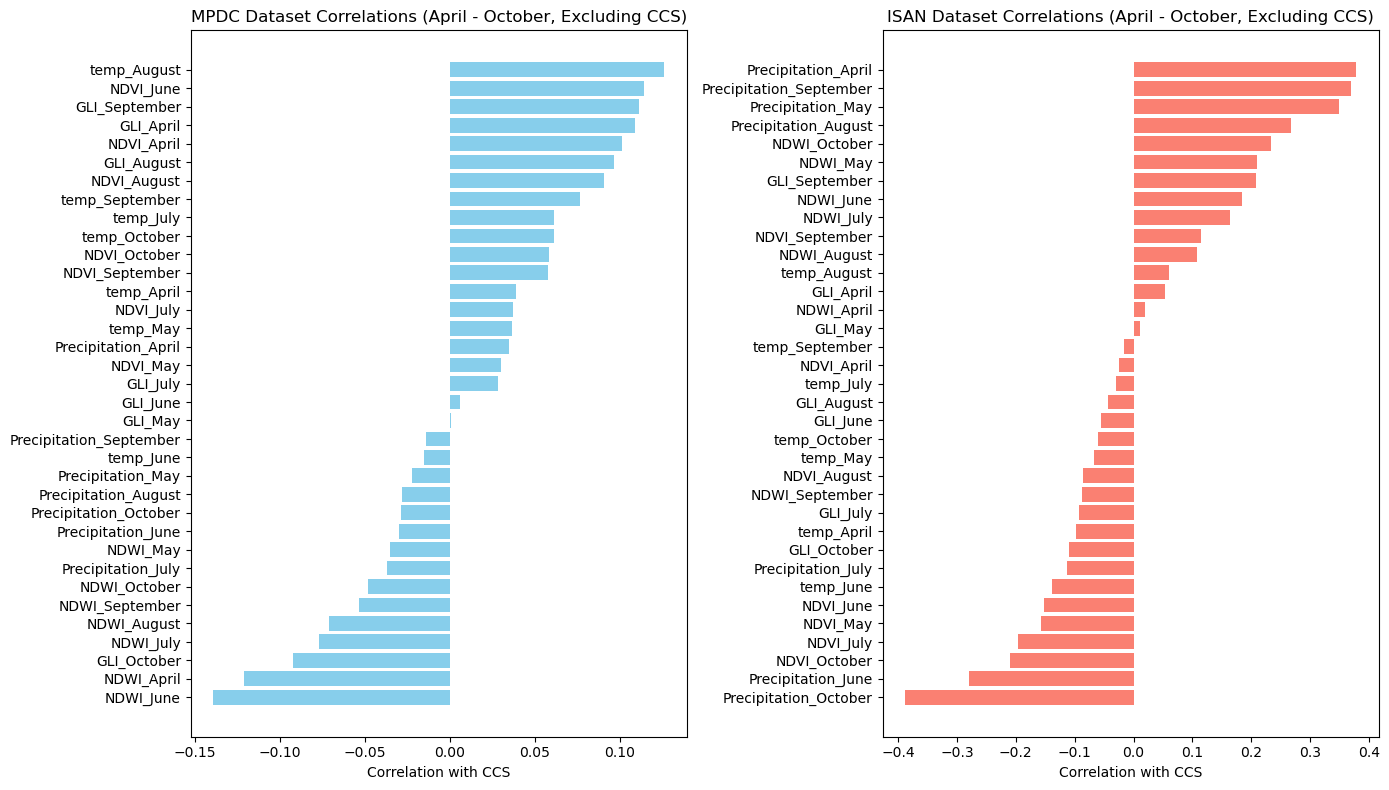

In [ ]:
# Removing 'ccs' from the correlations before plotting
mpdc_december_corr_apr_oct_no_ccs = mpdc_december_corr_apr_oct.drop('ccs')
isan_december_corr_apr_oct_no_ccs = isan_december_corr_apr_oct.drop('ccs')

# Plotting all features' correlations for both datasets without 'ccs'
plt.figure(figsize=(14, 8))

# Plot MPDC correlations without 'ccs'
plt.subplot(1, 2, 1)
plt.barh(mpdc_december_corr_apr_oct_no_ccs.index, mpdc_december_corr_apr_oct_no_ccs.values, color='skyblue')
plt.xlabel("Correlation with CCS")
plt.title("MPDC Dataset Correlations (April - October, Excluding CCS)")
plt.gca().invert_yaxis()

# Plot ISAN correlations without 'ccs'
plt.subplot(1, 2, 2)
plt.barh(isan_december_corr_apr_oct_no_ccs.index, isan_december_corr_apr_oct_no_ccs.values, color='salmon')
plt.xlabel("Correlation with CCS")
plt.title("ISAN Dataset Correlations (April - October, Excluding CCS)")
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()


#X_test.shape
ISAN
#selu
#Average MAE: 0.4979891573189443
#Average RMSE: 0.6312981377285537
#relu
#Average MAE: 0.5359226378158841
#Average RMSE: 0.6794980648631167

Average MAE: 0.5401284364214014
Average RMSE: 0.683599805025727


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import QuantileRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load your data (update paths as needed)
mpdc_data = pd.read_excel('Merged_Dan_Chang_Data_with_Indices_combine_finish.xlsx', sheet_name='Sheet1')
isan_data = pd.read_excel('Merged_ISAN_Data_with_Indices_Merg_finish.xlsx', sheet_name='Sheet1')

# Filter and process the data
mpdc_data['วันที่'] = pd.to_datetime(mpdc_data['วันที่'], errors='coerce')
isan_data['วันที่'] = pd.to_datetime(isan_data['วันที่'], errors='coerce')
mpdc_december_data = mpdc_data[mpdc_data['วันที่'].dt.month == 1]
isan_december_data = isan_data[isan_data['วันที่'].dt.month == 1]

# Define selected months for feature selection
selected_months = ['April', 'May', 'June', 'July', 'August', 'September', 'October']

# Selecting the relevant columns for analysis, including 'ccs' and indices for the selected months
ndvi_columns = [col for col in mpdc_data.columns if 'NDVI' in col and any(month in col for month in selected_months)]
gli_columns = [col for col in mpdc_data.columns if 'GLI' in col and any(month in col for month in selected_months)]
ndwi_columns = [col for col in mpdc_data.columns if 'NDWI' in col and any(month in col for month in selected_months)]
precipitation_columns = [col for col in mpdc_data.columns if 'Precipitation' in col and any(month in col for month in selected_months)]

# Combine selected indices and target ('ccs') for model training
relevant_columns_updated = ['ccs'] + ndvi_columns + gli_columns + ndwi_columns + precipitation_columns

# Filter data for the relevant columns only
mpdc_december_filtered = mpdc_december_data[relevant_columns_updated]
isan_december_filtered = isan_data[relevant_columns_updated]

# Combine datasets for model training
combined_december_data = pd.concat([isan_december_filtered,mpdc_december_filtered])

# Prepare features (X) and target (y)
X = combined_december_data.drop(columns=['ccs'])
y = combined_december_data['ccs']

# Handle missing values by filling with the mean
X.fillna(X.mean(), inplace=True)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train quantile regressors for lower (q=0.1) and upper (q=0.9) quantiles
lower_quantile = 0.05
upper_quantile = 0.95

model_lower = QuantileRegressor(quantile=lower_quantile, alpha=0.0, solver='highs-ds')
model_upper = QuantileRegressor(quantile=upper_quantile, alpha=0.0, solver='highs-ds')

# Fit the models
model_lower.fit(X_train, y_train)
model_upper.fit(X_train, y_train)

# Predict lower and upper bounds
y_pred_lower = model_lower.predict(X_test)
y_pred_upper = model_upper.predict(X_test)

# Conformalize prediction intervals
residuals_lower = y_train - model_lower.predict(X_train)
residuals_upper = model_upper.predict(X_train) - y_train

# Calculate conformal quantiles
conformal_lower = np.percentile(residuals_lower, 100 * lower_quantile)
conformal_upper = np.percentile(residuals_upper, 100 * (1 - upper_quantile))

# Adjust prediction intervals with conformal bounds
y_pred_lower_conformal = y_pred_lower - conformal_lower
y_pred_upper_conformal = y_pred_upper + conformal_upper

# Evaluate the prediction intervals
coverage = np.mean((y_test >= y_pred_lower_conformal) & (y_test <= y_pred_upper_conformal))
interval_width = np.mean(y_pred_upper_conformal - y_pred_lower_conformal)

print(f"Coverage: {coverage * 100:.2f}%")
print(f"Average Interval Width: {interval_width:.2f}")



Coverage: 85.32%
Average Interval Width: 2.65


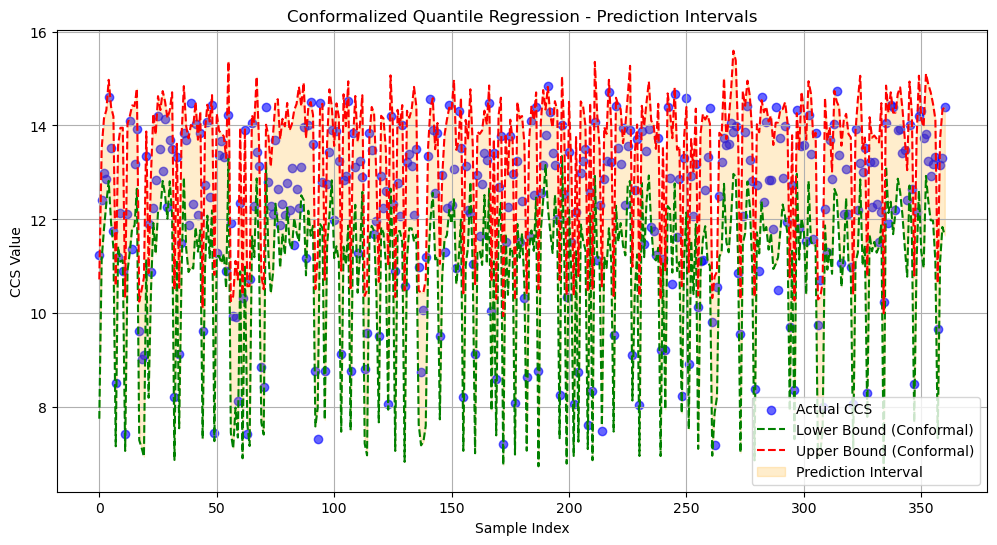

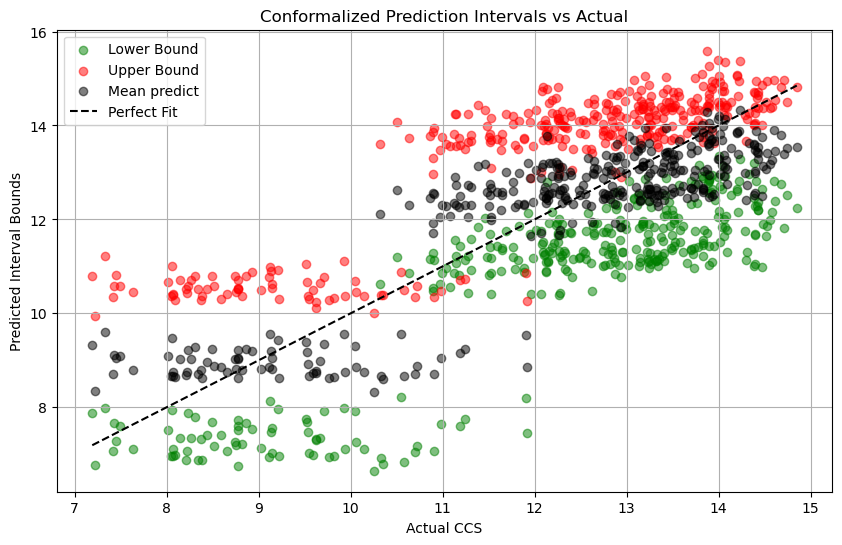

In [ ]:
# Visualize the prediction intervals
plt.figure(figsize=(12, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual CCS', alpha=0.6)
plt.plot(range(len(y_test)), y_pred_lower_conformal, color='green', linestyle='--', label='Lower Bound (Conformal)')
plt.plot(range(len(y_test)), y_pred_upper_conformal, color='red', linestyle='--', label='Upper Bound (Conformal)')
plt.fill_between(range(len(y_test)), y_pred_lower_conformal, y_pred_upper_conformal, color='orange', alpha=0.2, label='Prediction Interval')
plt.legend()
plt.title("Conformalized Quantile Regression - Prediction Intervals")
plt.xlabel("Sample Index")
plt.ylabel("CCS Value")
plt.grid(True)
plt.show()

# Scatter plot of predicted intervals
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lower_conformal, color='green', label='Lower Bound', alpha=0.5)
plt.scatter(y_test, y_pred_upper_conformal, color='red', label='Upper Bound', alpha=0.5)
plt.scatter(y_test, y_pred_upper_conformal*0.5+y_pred_lower_conformal*0.5, color='black', label='Mean predict', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black', linestyle='--', label='Perfect Fit')
plt.xlabel("Actual CCS")
plt.ylabel("Predicted Interval Bounds")
plt.legend()
plt.title("Conformalized Prediction Intervals vs Actual")
plt.grid(True)
plt.show()

In [ ]:
pddd=y_pred_upper_conformal*0.5+y_pred_lower_conformal*0.5
mae = mean_absolute_error(y_test,pddd )
rmse = np.sqrt(mean_squared_error(y_test,pddd))
mae,rmse

(0.7328074580995579, 0.9043019733102622)

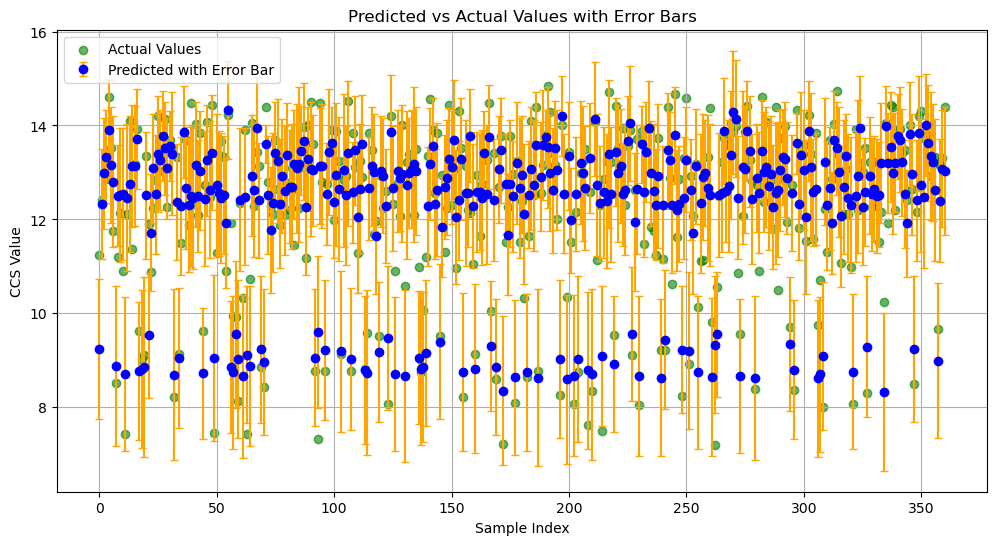

In [ ]:
# Plot predicted vs actual values with error bars
plt.figure(figsize=(12, 6))
plt.errorbar(
    range(len(y_test)),  # X-axis: Sample index
    (y_pred_lower_conformal + y_pred_upper_conformal) / 2,  # Y-axis: Predicted value (mean of bounds)
    yerr=(y_pred_upper_conformal - y_pred_lower_conformal) / 2,  # Error bars: Half of the interval width
    fmt='o', color='blue', ecolor='orange', elinewidth=1.5, capsize=3, label='Predicted with Error Bar'
)
plt.scatter(range(len(y_test)), y_test, color='green', label='Actual Values', alpha=0.6)
plt.xlabel("Sample Index")
plt.ylabel("CCS Value")
plt.title("Predicted vs Actual Values with Error Bars")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import joblib

# Save lower and upper quantile models
joblib.dump(model_lower, 'model_lower.pkl')
joblib.dump(model_upper, 'model_upper.pkl')

# Save additional parameters (conformal residuals and quantiles)
conformal_params = {
    'conformal_lower': conformal_lower,
    'conformal_upper': conformal_upper,
    'lower_quantile': lower_quantile,
    'upper_quantile': upper_quantile
}
joblib.dump(conformal_params, 'conformal_params.pkl')

print("Models and parameters saved successfully!")

Models and parameters saved successfully!


In [ ]:
# Load lower and upper quantile models
model_lower_loaded = joblib.load('model_lower.pkl')
model_upper_loaded = joblib.load('model_upper.pkl')

# Load additional parameters
conformal_params_loaded = joblib.load('conformal_params.pkl')

# Access parameters
conformal_lower_loaded = conformal_params_loaded['conformal_lower']
conformal_upper_loaded = conformal_params_loaded['conformal_upper']
lower_quantile_loaded = conformal_params_loaded['lower_quantile']
upper_quantile_loaded = conformal_params_loaded['upper_quantile']

print("Models and parameters loaded successfully!")

Models and parameters loaded successfully!


In [ ]:
# Example input data for prediction
new_data = X_test.iloc[:5]  # Replace with app input

# Predict lower and upper bounds
y_pred_lower = model_lower_loaded.predict(new_data)
y_pred_upper = model_upper_loaded.predict(new_data)

# Adjust predictions using conformal residuals
y_pred_lower_conformal = y_pred_lower - conformal_lower_loaded
y_pred_upper_conformal = y_pred_upper + conformal_upper_loaded

# Print prediction intervals
for i, (lower, upper) in enumerate(zip(y_pred_lower_conformal, y_pred_upper_conformal)):
    print(f"Sample {i+1}: Prediction Interval = ({lower:.2f}, {upper:.2f})")

Sample 1: Prediction Interval = (7.75, 10.72)
Sample 2: Prediction Interval = (11.15, 13.50)
Sample 3: Prediction Interval = (11.80, 14.15)
Sample 4: Prediction Interval = (12.34, 14.33)
Sample 5: Prediction Interval = (12.82, 14.97)


In [ ]:
%pip install xgboost openpyxl

In [ ]:
import xgboost as xgb
print(xgb.__version__)

2.1.2


In [ ]:
%pip freeze > requirements.txt

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split

# Load your data (update paths as needed)
mpdc_data = pd.read_excel('Merged_Dan_Chang_Data_with_Indices_combine_finish.xlsx', sheet_name='Sheet1')
isan_data = pd.read_excel('Merged_ISAN_Data_with_Indices_Merg_finish.xlsx', sheet_name='Sheet1')

# Filter and process the data
mpdc_data['วันที่'] = pd.to_datetime(mpdc_data['วันที่'], errors='coerce')
isan_data['วันที่'] = pd.to_datetime(isan_data['วันที่'], errors='coerce')
mpdc_december_data = mpdc_data[mpdc_data['วันที่'].dt.month == 12]
isan_december_data = isan_data[isan_data['วันที่'].dt.month == 12]

# Define selected months for feature selection
selected_months = ['April', 'May', 'June', 'July', 'August', 'September', 'October']

# Selecting the relevant columns for analysis, including 'ccs' and indices for the selected months
ndvi_columns = [col for col in mpdc_data.columns if 'NDVI' in col and any(month in col for month in selected_months)]
gli_columns = [col for col in mpdc_data.columns if 'GLI' in col and any(month in col for month in selected_months)]
ndwi_columns = [col for col in mpdc_data.columns if 'NDWI' in col and any(month in col for month in selected_months)]
precipitation_columns = [col for col in mpdc_data.columns if 'Precipitation' in col and any(month in col for month in selected_months)]

# Combine selected indices and target ('ccs') for model training
relevant_columns_updated = ['ccs'] + ndvi_columns + gli_columns + ndwi_columns + precipitation_columns

# Filter data for the relevant columns only
mpdc_december_filtered = mpdc_december_data[relevant_columns_updated]
isan_december_filtered = isan_data[relevant_columns_updated]

# Combine datasets for model training
combined_december_data = pd.concat([mpdc_december_filtered,isan_december_filtered])

# Prepare features (X) and target (y)
X = combined_december_data.drop(columns=['ccs'])
y = combined_december_data['ccs']

# Handle missing values by filling with the mean
X.fillna(X.mean(), inplace=True)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the function to train the XGBoost quantile model
def train_xgboost_model(x_train, y_train, x_test, y_test, alpha):
    evals_result = {}

    # Create QuantileDMatrix
    Xy_train = xgb.QuantileDMatrix(x_train, y_train)
    Xy_test = xgb.QuantileDMatrix(x_test, y_test, ref=Xy_train)

    # Train the quantile regression model
    booster = xgb.train(
        {
            "objective": "reg:quantileerror",  # Use quantile regression objective
            "tree_method": "hist",
            "quantile_alpha": alpha,
            "learning_rate": 0.04,
            "max_depth":7,
        },
        Xy_train,
        num_boost_round=100,
        early_stopping_rounds=2,
        evals=[(Xy_train, "Train"), (Xy_test, "Test")],
        evals_result=evals_result,
    )
    return booster

alpha = np.array([0.05, 0.5, 0.95])

booster = train_xgboost_model(X_train, y_train, X_test, y_test, alpha)

scores = booster.inplace_predict(X_test)

y_lower = scores[:, 0]
y_median = scores[:, 1]
y_upper = scores[:, 2]

y_lower = np.minimum(y_lower, y_upper)
y_upper = np.maximum(y_lower, y_upper)

coverage = np.mean((y_test >= y_lower) & (y_test <= y_upper))
interval_width = np.mean(y_upper - y_lower)

print(f"Coverage: {coverage * 100:.2f}%")
print(f"Average Interval Width: {interval_width:.2f}")

[0]	Train-quantile:0.78566	Test-quantile:0.80142
[1]	Train-quantile:0.74294	Test-quantile:0.76030
[2]	Train-quantile:0.70262	Test-quantile:0.72251
[3]	Train-quantile:0.66462	Test-quantile:0.68734
[4]	Train-quantile:0.62919	Test-quantile:0.65324
[5]	Train-quantile:0.59591	Test-quantile:0.62149
[6]	Train-quantile:0.56421	Test-quantile:0.59140
[7]	Train-quantile:0.53391	Test-quantile:0.56260
[8]	Train-quantile:0.50523	Test-quantile:0.53544
[9]	Train-quantile:0.47821	Test-quantile:0.50890
[10]	Train-quantile:0.45256	Test-quantile:0.48325
[11]	Train-quantile:0.42905	Test-quantile:0.45994
[12]	Train-quantile:0.40687	Test-quantile:0.43816
[13]	Train-quantile:0.38603	Test-quantile:0.41729
[14]	Train-quantile:0.36648	Test-quantile:0.39859
[15]	Train-quantile:0.34804	Test-quantile:0.38041
[16]	Train-quantile:0.33093	Test-quantile:0.36380
[17]	Train-quantile:0.31510	Test-quantile:0.34849
[18]	Train-quantile:0.30051	Test-quantile:0.33461
[19]	Train-quantile:0.28639	Test-quantile:0.32108
[20]	Train

In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 361 entries, 1352 to 984
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   NDVI_April               361 non-null    float64
 1   NDVI_May                 361 non-null    float64
 2   NDVI_June                361 non-null    float64
 3   NDVI_July                361 non-null    float64
 4   NDVI_August              361 non-null    float64
 5   NDVI_September           361 non-null    float64
 6   NDVI_October             361 non-null    float64
 7   GLI_April                361 non-null    float64
 8   GLI_May                  361 non-null    float64
 9   GLI_June                 361 non-null    float64
 10  GLI_July                 361 non-null    float64
 11  GLI_August               361 non-null    float64
 12  GLI_September            361 non-null    float64
 13  GLI_October              361 non-null    float64
 14  NDWI_April               361

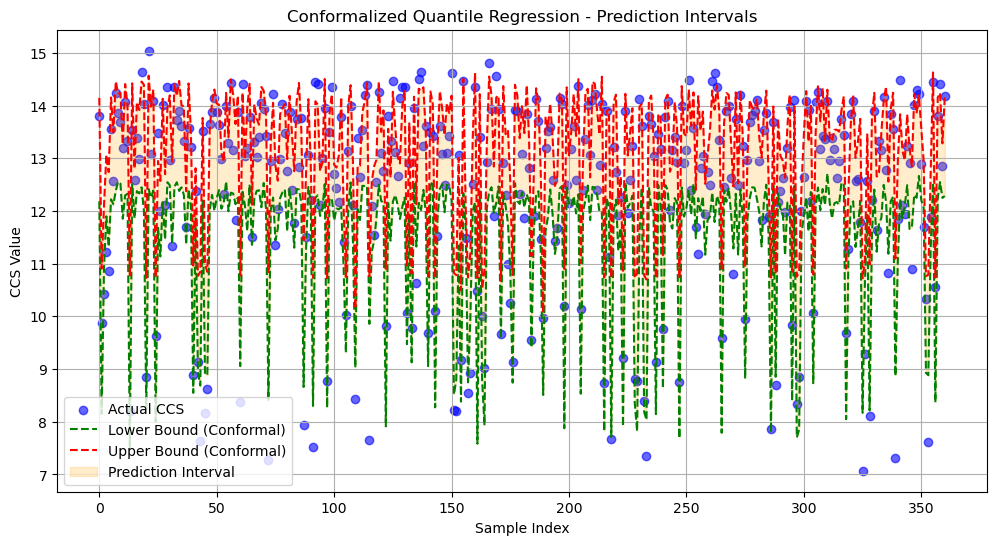

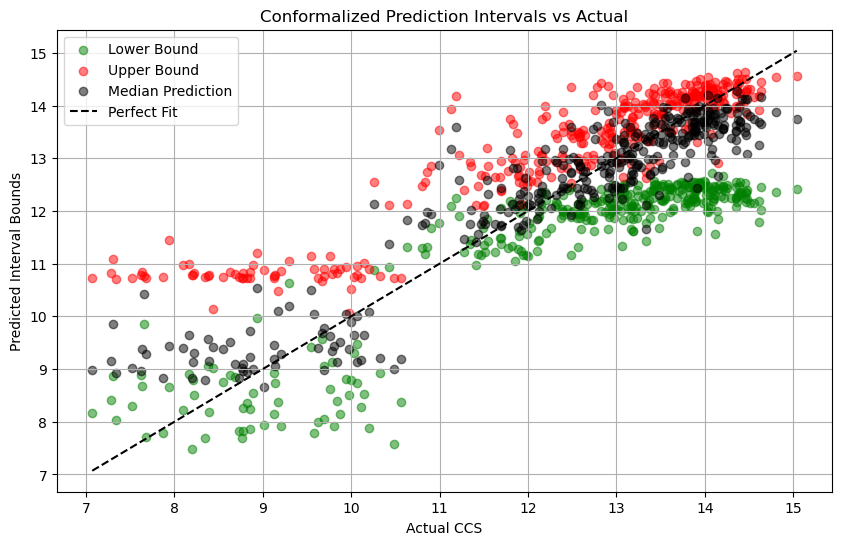

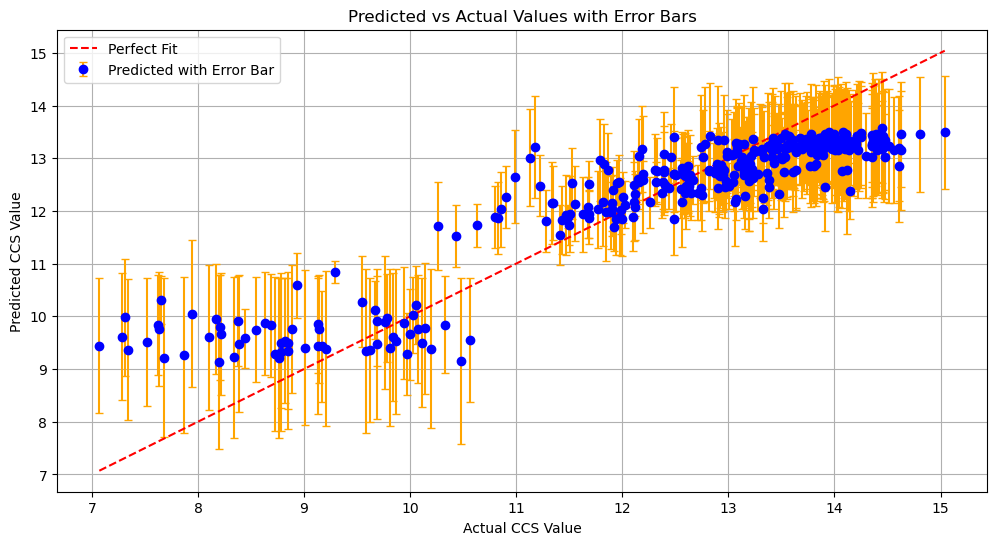

In [ ]:
# --- Visualization 1: Prediction Intervals ---
plt.figure(figsize=(12, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual CCS', alpha=0.6)
plt.plot(range(len(y_test)), y_lower, color='green', linestyle='--', label='Lower Bound (Conformal)')
plt.plot(range(len(y_test)), y_upper, color='red', linestyle='--', label='Upper Bound (Conformal)')
plt.fill_between(range(len(y_test)), y_lower, y_upper, color='orange', alpha=0.2, label='Prediction Interval')
plt.legend()
plt.title("Conformalized Quantile Regression - Prediction Intervals")
plt.xlabel("Sample Index")
plt.ylabel("CCS Value")
plt.grid(True)
plt.show()

# --- Visualization 2: Scatter Plot with Bounds ---
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_lower, color='green', label='Lower Bound', alpha=0.5)
plt.scatter(y_test, y_upper, color='red', label='Upper Bound', alpha=0.5)
plt.scatter(y_test, y_median, color='black', label='Median Prediction', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black', linestyle='--', label='Perfect Fit')
plt.xlabel("Actual CCS")
plt.ylabel("Predicted Interval Bounds")
plt.legend()
plt.title("Conformalized Prediction Intervals vs Actual")
plt.grid(True)
plt.show()

# --- Visualization 3: Predicted vs Actual with Error Bars ---
plt.figure(figsize=(12, 6))
plt.errorbar(
    y_test,  # Actual values on the x-axis
    (y_lower + y_upper) / 2,  # Predicted mean on the y-axis
    yerr=(y_upper - y_lower) / 2,  # Error bars as half interval width
    fmt='o', color='blue', ecolor='orange', elinewidth=1.5, capsize=3, label='Predicted with Error Bar'
)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Fit')
plt.xlabel("Actual CCS Value")
plt.ylabel("Predicted CCS Value")
plt.title("Predicted vs Actual Values with Error Bars")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# ค่าที่ต้องการตรวจสอบ
threshold = 12

# ตรวจสอบจุดที่มีโอกาสต่ำกว่า threshold
below_threshold = (y_upper < threshold)  # ทุกจุดที่ค่าบนสุดของช่วงต่ำกว่า threshold
above_threshold = (y_lower > threshold)  # ทุกจุดที่ค่าล่างสุดของช่วงสูงกว่า threshold

# สร้าง DataFrame เพื่อสรุปผล
alert_df = pd.DataFrame({
    "Actual Value": y_test,
    "Predicted Lower Bound": y_lower,
    "Predicted Upper Bound": y_upper,
    "Below Threshold": below_threshold,
    "Above Threshold": above_threshold
})

# แสดงข้อมูลจุดที่มีโอกาสต่ำกว่า threshold
below_alerts = alert_df[alert_df["Below Threshold"]]
print("Points with predictions below the threshold:")
print(below_alerts)

# แสดงข้อมูลจุดที่มีโอกาสมากกว่า threshold
above_alerts = alert_df[alert_df["Above Threshold"]]
print("\nPoints with predictions above the threshold:")
print(above_alerts)

Points with predictions below the threshold:
     Actual Value  Predicted Lower Bound  Predicted Upper Bound  \
116          9.87               8.152183              10.905493   
239          8.20               7.490685              10.775245   
186          8.85               8.246277              10.727423   
347          9.62               8.003430              10.735432   
160          8.89               8.546833              10.964733   
..            ...                    ...                    ...   
299          8.10               8.213556              10.982844   
305          7.31               8.867906              11.094375   
221         10.33               8.926628              10.762669   
350          7.62               8.882297              10.789855   
358         10.56               8.366482              10.735432   

     Below Threshold  Above Threshold  
116             True            False  
239             True            False  
186             True          

In [ ]:
def send_alert(alerts, condition):
    if len(alerts) > 0:
        print(f"\nALERT: {len(alerts)} points are {condition} the threshold of {threshold}:")
        print(alerts[["Actual Value", "Predicted Lower Bound", "Predicted Upper Bound"]])
    else:
        print(f"\nNo points found {condition} the threshold of {threshold}.")

# แจ้งเตือนจุดต่ำกว่า threshold
send_alert(below_alerts, "below")

# แจ้งเตือนจุดสูงกว่า threshold
send_alert(above_alerts, "above")


ALERT: 62 points are below the threshold of 12:
     Actual Value  Predicted Lower Bound  Predicted Upper Bound
116          9.87               8.152183              10.905493
239          8.20               7.490685              10.775245
186          8.85               8.246277              10.727423
347          9.62               8.003430              10.735432
160          8.89               8.546833              10.964733
..            ...                    ...                    ...
299          8.10               8.213556              10.982844
305          7.31               8.867906              11.094375
221         10.33               8.926628              10.762669
350          7.62               8.882297              10.789855
358         10.56               8.366482              10.735432

[62 rows x 3 columns]

ALERT: 206 points are above the threshold of 12:
      Actual Value  Predicted Lower Bound  Predicted Upper Bound
1352         13.80              12.182608    

In [ ]:
mae = mean_absolute_error(y_test,y_median)
rmse = np.sqrt(mean_squared_error(y_test,y_median))
mae,rmse

(0.5011709086452495, 0.6804991829748157)

(0.5017917385788175, 0.6807283108411396)  7 100 0.04

In [ ]:
import joblib
import xgboost as xgb

# Save the trained XGBoost model
#booster.save_model("xgboost_quantile_m2.json")

# Save quantile values and other parameters
model_metadata = {
    "alpha": alpha,
}
#joblib.dump(model_metadata, "model_metadata_M2.pkl")

print("Model and metadata saved successfully!")

Model and metadata saved successfully!


In [ ]:
# Load the trained XGBoost model
loaded_booster = xgb.Booster()
loaded_booster.load_model('xgboost_quantile_m12.json')

# Load metadata (e.g., quantile values)
loaded_metadata = joblib.load("model_metadata_M12.pkl")
loaded_alpha = loaded_metadata["alpha"]

print("Model and metadata loaded successfully!")

Model and metadata loaded successfully!


In [ ]:
scores = loaded_booster.inplace_predict(X_test, validate_features=True)

y_lower = scores[:, 0]  # alpha=0.05
y_median = scores[:, 1]  # alpha=0.5
y_upper = scores[:, 2]  # alpha=0.95

for i in range(5):
    print(f"Sample {i+1}:")
    print(f"  Lower Bound: {y_lower[i]:.2f}")
    print(f"  Median: {y_median[i]:.2f}")
    print(f"  Upper Bound: {y_upper[i]:.2f}")

Sample 1:
  Lower Bound: 12.18
  Median: 13.86
  Upper Bound: 14.15
Sample 2:
  Lower Bound: 8.15
  Median: 9.51
  Upper Bound: 10.91
Sample 3:
  Lower Bound: 10.93
  Median: 11.36
  Upper Bound: 12.10
Sample 4:
  Lower Bound: 11.90
  Median: 12.59
  Upper Bound: 13.06
Sample 5:
  Lower Bound: 11.32
  Median: 11.99
  Upper Bound: 12.74


In [ ]:
import pandas as pd

# Example DataFrame with predictions
predictions = pd.DataFrame({
    "Lower Bound": y_lower,
    "Median": y_median,
    "Upper Bound": y_upper
})

# Add category column
predictions['Category'] = pd.cut(
    predictions['Median'], bins=[-np.inf, 10, 12, np.inf], labels=['Low', 'Medium', 'High']
)

# Count each category
category_counts = predictions['Category'].value_counts()

# Print results
print(category_counts)


Category
High      273
Low        53
Medium     35
Name: count, dtype: int64


In [ ]:
%pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.0/199.0 MB 5.3 MB/s eta 0:00:00


In [ ]:
import requests
import pandas as pd
import xgboost as xgb
import joblib

api_url = "https://mitrphol-api-3.thetigerteamacademy.net/mpl/period?startYear=2023&endYear=2023&startMonth=4&endMonth=10"
response = requests.get(api_url)

if response.status_code == 200:
    api_data = response.json()
    print("Data fetched successfully!")
else:
    raise Exception(f"Failed to fetch data from API. Status code: {response.status_code}")

data = pd.DataFrame(api_data)

loaded_booster = xgb.Booster()
loaded_booster.load_model("xgboost_quantile_m12.json")

loaded_metadata = joblib.load("model_metadata_M12.pkl")
alpha = loaded_metadata["alpha"]

required_features = [
    "NDVI_April", "NDVI_May", "NDVI_June", "NDVI_July", "NDVI_August",
    "NDVI_September", "NDVI_October", "GLI_April", "GLI_May", "GLI_June",
    "GLI_July", "GLI_August", "GLI_September", "GLI_October", "NDWI_April",
    "NDWI_May", "NDWI_June", "NDWI_July", "NDWI_August", "NDWI_September",
    "NDWI_October", "Precipitation_April", "Precipitation_May",
    "Precipitation_June", "Precipitation_July", "Precipitation_August",
    "Precipitation_September", "Precipitation_October"
]

data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
data['Month'] = data['Date'].dt.strftime('%B')

for base_feature in ['NDVI', 'GLI', 'NDWI', 'Precipitation']:
    for month in ['April', 'May', 'June', 'July', 'August', 'September', 'October']:
        data[f"{base_feature}_{month}"] = data.apply(
            lambda row: row[base_feature] if row['Month'] == month else 0, axis=1
        )

# data = data.drop(columns=['NDVI', 'GLI', 'NDWI', 'Precipitation', 'Month', 'Date'])

missing_features = [feature for feature in required_features if feature not in data.columns]
for feature in missing_features:
    data[feature] = 0

X = data[required_features]

dmatrix = xgb.DMatrix(X)
# scores = loaded_booster.predict(dmatrix)
scores = loaded_booster.inplace_predict(X, validate_features=True)

y_lower = scores[:, 0]
y_median = scores[:, 1]
y_upper = scores[:, 2]

data['Lower_Bound'] = y_lower
data['Median'] = y_median
data['Upper_Bound'] = y_upper

output_columns = ["ID", "PlantID", "GeoWGS84", "Lower_Bound", "Median", "Upper_Bound"]
print("\nPredicted results:")
print(data[output_columns].head())

data[output_columns].to_csv("predicted_results_mpk.csv", index=False)
print("\nResults saved to 'predicted_results.csv'")

Data fetched successfully!

Predicted results:
       ID          PlantID                                           GeoWGS84  \
0  273575  220510130036315  POLYGON ((102.076278973 17.0134771931 ,102.074...   
1  302561  230223140052312  POLYGON ((102.010498052 17.0888000127 ,102.007...   
2  457689  240502158734963  POLYGON ((101.842242735 17.2277981438 ,101.844...   
3  546731  240606159905486  POLYGON ((102.079564674 17.0308464793 ,102.079...   
4  558280  240610159974285  POLYGON ((101.860251672 17.1677029165 ,101.861...   

   Lower_Bound    Median  Upper_Bound  
0     9.413054  9.846171    11.124800  
1     9.430330  9.831813    11.206677  
2     9.422458  9.846171    11.124800  
3     9.307130  9.846171    11.146476  
4     9.986701  9.894656    11.185001  

Results saved to 'predicted_results.csv'


In [ ]:
data.count()

,0
ID,219632
NDVI,219632
NDWI,219632
GLI,219632
Precipitation,219632
Soilmoiture,219632
GeoWGS84,219632
Lat,219632
Lon,219632
Date,219632


In [ ]:
# กรองข้อมูลที่ Median > 12
median_greater_than_12 = data

# แสดงผลลัพธ์เฉพาะคอลัมน์ที่ต้องการ
output_columns = ["ID", "PlantID", "GeoWGS84", "Lower_Bound", "Median", "Upper_Bound"]
print("\nPredicted results with Median > 12:")
print(median_greater_than_12[output_columns].count())



Predicted results with Median > 12:
ID             45192
PlantID        45192
GeoWGS84       45192
Lower_Bound    45192
Median         45192
Upper_Bound    45192
dtype: int64


In [ ]:
loaded_metadata["alpha"]

array([0.05, 0.5 , 0.95])

In [ ]:
data.head()

,ID,Soilmoiture,GeoWGS84,Lat,Lon,PlantID,NDVI_April,NDVI_May,NDVI_June,NDVI_July,...,Precipitation_April,Precipitation_May,Precipitation_June,Precipitation_July,Precipitation_August,Precipitation_September,Precipitation_October,Lower_Bound,Median,Upper_Bound
0,843229,0.618000,POLYGON ((103.88152707151929 16.37532925812289...,16.375663,103.881398,301721643,0.0,0.000000,0.196585,0.0,...,0.0,0.000000,7.967667,0.0,0.0,0.000,0.0,10.506118,10.021373,11.020032
1,884337,0.618000,"POLYGON ((103.827564465514 16.4377829930922 ,1...",16.437214,103.827857,81203003,0.0,0.000000,0.295525,0.0,...,0.0,0.000000,7.967667,0.0,0.0,0.000,0.0,10.090478,9.584019,10.607684
2,238329,0.874000,"POLYGON ((103.11360667 16.47171333 ,103.113635...",16.471859,103.115306,823305276,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.0,13.415,0.0,10.097172,9.972109,11.094589
3,843233,0.668667,"POLYGON ((103.30460284 16.5568791199965 ,103.3...",16.556549,103.303895,72108012,0.0,0.000000,0.182890,0.0,...,0.0,0.000000,7.518667,0.0,0.0,0.000,0.0,10.506118,10.021373,11.020032
4,238327,0.464516,POLYGON ((104.11464166666897 16.22847166667073...,16.228096,104.114069,53222022,0.0,0.304682,0.000000,0.0,...,0.0,3.416452,0.000000,0.0,0.0,0.000,0.0,10.286212,9.790203,11.133310


In [ ]:
import requests
import pandas as pd

# API URL
api_url = "https://mitrphol-ml.api.thetigerteamacademy.net/predict/model/xgboost?zone=sb"

try:
    # Fetch data from the API
    response = requests.get(api_url)

    # Check if the request was successful
    if response.status_code == 200:
        api_data = response.json()  # Parse the JSON response
        print("Data fetched successfully!")

        # Check if the data contains the expected structure
        if "predictions" in api_data and isinstance(api_data["predictions"], list):
            # Convert the list of predictions into a DataFrame
            predictions = pd.DataFrame(api_data["predictions"])

            # Filter rows where prediction > 12
            filtered_data = predictions[predictions["prediction"] >= 12.0]

            print("Filtered Data (prediction > 12):")
            print(filtered_data)

        else:
            print("The API returned an empty or unexpected data structure.")
    else:
        # Handle HTTP errors
        response.raise_for_status()

except requests.exceptions.RequestException as e:
    print(f"An error occurred while fetching data: {e}")


Data fetched successfully!
Filtered Data (prediction > 12):
             lat         lon  prediction_lower_bound  prediction  \
1765   15.757140  100.878755               12.138780   12.387314   
1819   15.756286  100.878565               12.231221   12.327557   
2006   15.755286  100.835147               12.068534   12.375797   
2023   15.756223  100.836219               12.231221   12.314330   
11611  15.763196  100.839312               12.112277   12.355856   
11875  15.773204  100.847462               12.068534   12.373651   
11960  15.758426  100.856501               12.179089   12.214415   
12129  15.757544  100.836260               12.231221   12.230266   
12206  15.753003  100.834811               12.118408   12.297136   
13040  15.778495  100.861032               12.231221   12.241838   
14204  15.764665  100.860698               12.231221   12.239270   
14248  15.795908  100.855382               12.231221   12.223041   
14257  15.805139  100.871032               12.112277   1

In [ ]:
import pandas as pd
print(pd.__version__)


2.2.2


In [ ]:
filtered_data.count()

,0
lat,40
lon,40
prediction_lower_bound,40
prediction,40
prediction_upper_bound,40
NDVI,40
NDWI,40
GLI,40
Precipitation,40
PlantID,40


In [ ]:
data.head()

,zone,prediction_date,predictions
0,SB,2024-11-24,"{'lat': 14.669363286084838, 'lon': 100.2435326..."
1,SB,2024-11-24,"{'lat': 14.73326351140315, 'lon': 100.73038338..."
2,SB,2024-11-24,"{'lat': 14.78996142127584, 'lon': 100.30698422..."
3,SB,2024-11-24,"{'lat': 14.736757413188602, 'lon': 100.2553450..."
4,SB,2024-11-24,"{'lat': 14.791355311053335, 'lon': 100.3024351..."
